In [1]:
#Imports

#Basic Imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import zipfile
import sklearn
import statsmodels.api as sm
import scipy
import warnings
warnings.filterwarnings('ignore')

#Plotting
import seaborn as sns
%matplotlib inline
sns.set_style('white')
from sklearn import neighbors
from sklearn import ensemble

#Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifier

#Data Infrastructure Pieces
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB




In [2]:
zf = zipfile.ZipFile("student.zip")
df = pd.read_csv(zf.open('student-mat.csv'),sep = ";")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df['failures'] = np.where(df['failures'] < 1, 0, 1)

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.210127,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.407915,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df_dumb = pd.get_dummies(df[['sex', 'school', 'higher', 'activities', 'nursery']],drop_first=True)
df_dumb.head()
df_newc = pd.concat([df_dumb,df[['age', 'failures']]], axis=1)

In [7]:
list(df_newc.columns)

['sex_M',
 'school_MS',
 'higher_yes',
 'activities_yes',
 'nursery_yes',
 'age',
 'failures']

In [8]:
df_newc.head()

,sex_M,school_MS,higher_yes,activities_yes,nursery_yes,age,failures
0,0,0,1,0,1,18,0
1,0,0,1,0,0,17,0
2,0,0,1,0,1,15,1
3,0,0,1,1,1,15,0
4,0,0,1,0,1,16,0


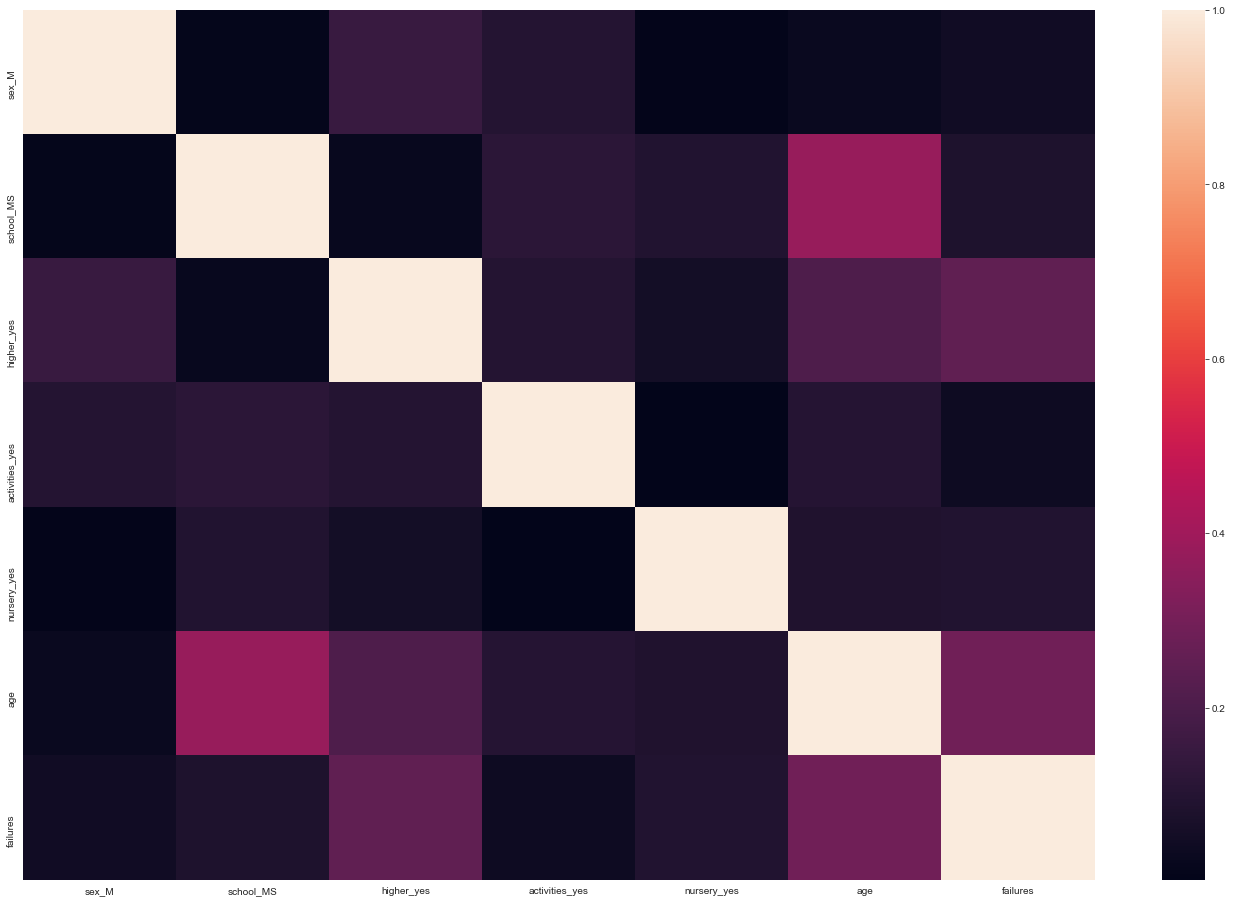

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 16)
sns.heatmap(df_newc.corr().abs())

In [10]:
X = df_newc.drop('failures', axis = 1)
Y = df_newc[['failures']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y, test_size=0.25)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(296, 6) (296, 1)
(99, 6) (99, 1)


Logistics Regression

In [11]:
# Declare predictors.
X_statsmod = X_train.copy()

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
#X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(Y_train, X_statsmod)
result = logit.fit(maxiter=1000)
# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.477298
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.070     
Dependent Variable: failures         AIC:              294.5602  
Date:               2019-06-05 22:53 BIC:              316.7024  
No. Observations:   296              Log-Likelihood:   -141.28   
Df Model:           5                LL-Null:          -151.92   
Df Residuals:       290              LLR p-value:      0.00071783
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
sex_M              0.0564   0.3008  0.1876 0.8512 -0.5331  0.6459
school_MS          0.1639   0.4513  0.3631 0.7165 -0.7206  1.0484


In [12]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_test)

# Code admission as 1 if probability is greater than .25.
pred_Y_statsmod = np.where(pred_statsmod < .25, 0, 1)
pred_Y_statsmod = np.expand_dims(pred_Y_statsmod, axis=1)


In [13]:
#print(classification_report(pred_Y_statsmod, Y_test))

In [14]:
confusion_matrix(pred_Y_statsmod, Y_test)

array([[67, 13],
       [11,  8]], dtype=int64)

In [15]:
f1_score(Y_test, pred_Y_statsmod)
#accuracy score not precision accuracy score

0.4

Ridge Logistic Regression

In [16]:
ridgemodel = RidgeClassifier(alpha=1.0, class_weight='balanced')
# alpha is default of 1.0 for ridge classifier things changed with balancing the weight class. Encompasses all variables in the entire picture.
ridgemodel.fit(X_train, Y_train)
y_pred=ridgemodel.predict(X_test)
ridgemodel.score(X_test, Y_test)

0.7373737373737373

In [17]:
print(y_pred)

[1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]


In [18]:
confusion_matrix(y_pred, Y_test)

array([[61,  9],
       [17, 12]], dtype=int64)

In [19]:
print(cross_val_score(ridgemodel, X_train, Y_train, cv=5))

[0.53333333 0.75       0.6440678  0.62711864 0.72413793]


In [20]:
f1_score(y_pred, Y_test)
#accuracy score not precision accuracy score

0.48000000000000004

Random Forest

In [21]:

from sklearn import ensemble


rfc = ensemble.RandomForestClassifier()
X = df_newc.drop('failures', 1)
Y = df_newc[['failures']]
cross_val_score(rfc, X, Y, cv=5)


array([0.8       , 0.8125    , 0.75949367, 0.82051282, 0.79487179])

In [22]:
print(X.shape, Y.shape)

(395, 6) (395, 1)


In [23]:
rfc.fit(X_train, Y_train)
y_pred=rfc.predict(X_test)
rfc.score(X_test, Y_test)

0.8282828282828283

In [24]:
confusion_matrix(y_pred, Y_test)

array([[73, 12],
       [ 5,  9]], dtype=int64)

In [25]:
print(cross_val_score(rfc, X_train, Y_train, cv=5))

[0.81666667 0.76666667 0.88135593 0.76271186 0.75862069]


In [26]:
f1_score(y_pred, Y_test)
#accuracy score not precision accuracy score

0.5142857142857143

In [27]:
print(rfc.feature_importances_)

# higher education and age are heavy importance to outcome of F1 score

[0.07056798 0.04061344 0.17921018 0.07313128 0.09257824 0.54389887]


Naive Bayes

In [28]:
#naive bayes addition
clf = MultinomialNB()
cross_val_score(clf, X, Y, cv=5)

array([0.7875    , 0.7875    , 0.78481013, 0.79487179, 0.76923077])

In [29]:
print(X.shape, Y.shape)

(395, 6) (395, 1)


In [30]:

clf.fit(X_train, Y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
y_pred=clf.predict(X_test)
clf.score(X_test, Y_test)


0.7878787878787878

In [31]:
confusion_matrix(y_pred, Y_test)

array([[78, 21],
       [ 0,  0]], dtype=int64)

In [32]:
print(cross_val_score(rfc, X_train, Y_train, cv=5))

[0.81666667 0.81666667 0.88135593 0.77966102 0.81034483]


In [33]:
f1_score(y_pred, Y_test)
#accuracy score not precision accuracy score

0.0